In [1]:
import numpy as np
import pandas as pd
import random

from function_modules.evaluation_module import *

In [2]:
# Shared directory to save results 
shared_data_dir = 'Data/evaluation/by_length/'

# Shared GA parameters
kwargs = {
    'cnn_model_path': '../../Models/CNN_6_1_2.keras',
    'seed': 0,
}

# Testing parameters
target_expressions = [0, 0.5, 1]
lineages = 10
test_cases = 10
random_sequences = 3

# pLac sequence
pLac_up = 'AATACTAGAGGTCTTCCGAC'
pLac_change = 'TTTACACTTTATGCTTCCGGCTCGTATGTT'
pLac_down = 'GTGTGGGCGGGAAGACAACTAGGGG'

In [3]:
# Generate random masked sequences

mask_counts = np.linspace(1, 8, test_cases, dtype=int)

def replace_sequence(seq, n):
    indices_to_replace = random.sample(range(len(seq)), n)
    return ''.join([seq[i] if i not in indices_to_replace else 'N' for i in range(len(seq))])

masked_sequences = {}
for mask_count in mask_counts:
    for i in range(random_sequences):
        masked_sequences[f'Mask Length {mask_count}, Variant {i}'] = pLac_up + replace_sequence(pLac_change, mask_count) + pLac_down

In [4]:
GA_df = test_genetic(masked_sequences, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}genetic_results.csv')

Processing combinations:   0%|          | 0/720 [00:00<?, ?it/s]

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 720/720 [19:17<00:00,  1.61s/it, Elapsed=19.29min, ETA=0.00s]  


In [5]:
CA_df = test_combinatorial(masked_sequences, target_expressions, kwargs, to_csv=f'{shared_data_dir}combinatorial_results.csv')

Processing combinations:   0%|          | 0/72 [00:00<?, ?it/s]c:\Users\rsore\Documents\GitHub\promoter-sequence-transcription-rates\v2\Testing GA\GA_deap\GA\CNN.py:61: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  tensor_sequences = torch.tensor(
Processing combinations:  89%|████████▉ | 64/72 [01:05<00:36,  4.59s/it, Elapsed=1.10min, ETA=8.22s]

Max iterations reached. Returning the best result found so far.


Processing combinations:  90%|█████████ | 65/72 [01:15<00:42,  6.01s/it, Elapsed=1.25min, ETA=8.08s]

Max iterations reached. Returning the best result found so far.


Processing combinations:  92%|█████████▏| 66/72 [01:23<00:39,  6.67s/it, Elapsed=1.39min, ETA=7.57s]

Max iterations reached. Returning the best result found so far.


Processing combinations:  93%|█████████▎| 67/72 [01:31<00:35,  7.11s/it, Elapsed=1.52min, ETA=6.82s]

Max iterations reached. Returning the best result found so far.


Processing combinations:  94%|█████████▍| 68/72 [01:39<00:30,  7.55s/it, Elapsed=1.67min, ETA=5.88s]

Max iterations reached. Returning the best result found so far.


Processing combinations:  96%|█████████▌| 69/72 [01:48<00:23,  7.83s/it, Elapsed=1.81min, ETA=4.72s]

Max iterations reached. Returning the best result found so far.


Processing combinations:  97%|█████████▋| 70/72 [01:57<00:16,  8.14s/it, Elapsed=1.96min, ETA=3.35s]

Max iterations reached. Returning the best result found so far.


Processing combinations:  99%|█████████▊| 71/72 [02:05<00:08,  8.23s/it, Elapsed=2.10min, ETA=1.77s]

Max iterations reached. Returning the best result found so far.


Processing combinations: 100%|██████████| 72/72 [02:13<00:00,  1.86s/it, Elapsed=2.23min, ETA=0.00s]

Max iterations reached. Returning the best result found so far.


In [6]:
# Read results from CSV files (if needed)
GA_df = pd.read_csv(f'{shared_data_dir}genetic_results.csv')
CA_df = pd.read_csv(f'{shared_data_dir}combinatorial_results.csv')

In [7]:
GA_df.head()

,algorithm,element,masked_sequence,mask_length,target_expression,lineage,sequence,error,predictions,run_time
0,Genetic Algorithm,"Mask Length 1, Variant 0",1,1,0.0,0,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,0.337836,0.337836,0.457608
1,Genetic Algorithm,"Mask Length 1, Variant 0",1,1,0.0,1,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,0.337836,0.337836,0.323313
2,Genetic Algorithm,"Mask Length 1, Variant 0",1,1,0.0,2,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,0.337836,0.337836,0.328771
3,Genetic Algorithm,"Mask Length 1, Variant 0",1,1,0.0,3,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,0.337836,0.337836,0.294223
4,Genetic Algorithm,"Mask Length 1, Variant 0",1,1,0.0,4,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,0.337836,0.337836,0.320246


In [8]:
# Concatenate the results from both algorithms
results_df = pd.concat([CA_df, GA_df], ignore_index=True)

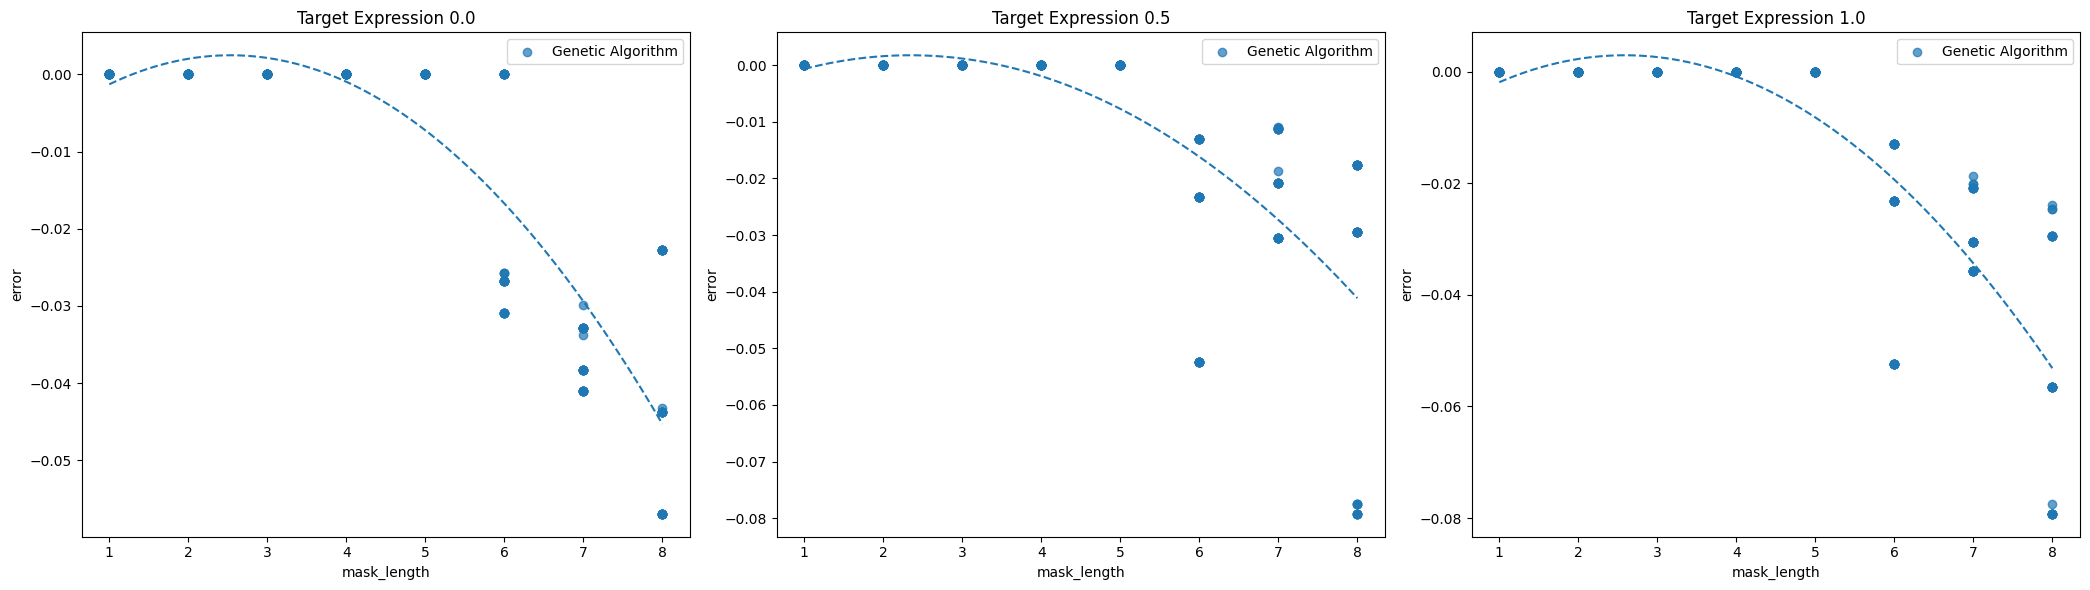

In [9]:
# Merge on 'masked_sequence' and 'target_expression'
merged_df = GA_df.merge(
    CA_df[['element', 'target_expression', 'error', 'run_time']],
    on=['element', 'target_expression'],
    suffixes=('_GA', '_CA')
)

# Calculate the error
merged_df['error'] = merged_df['error_GA'] - merged_df['error_CA']

for metric in ['error']:
    combinatorial_scatter_plot_by_metric(merged_df, metric, 'mask_length', 'algorithm', polynomial_degree=2)

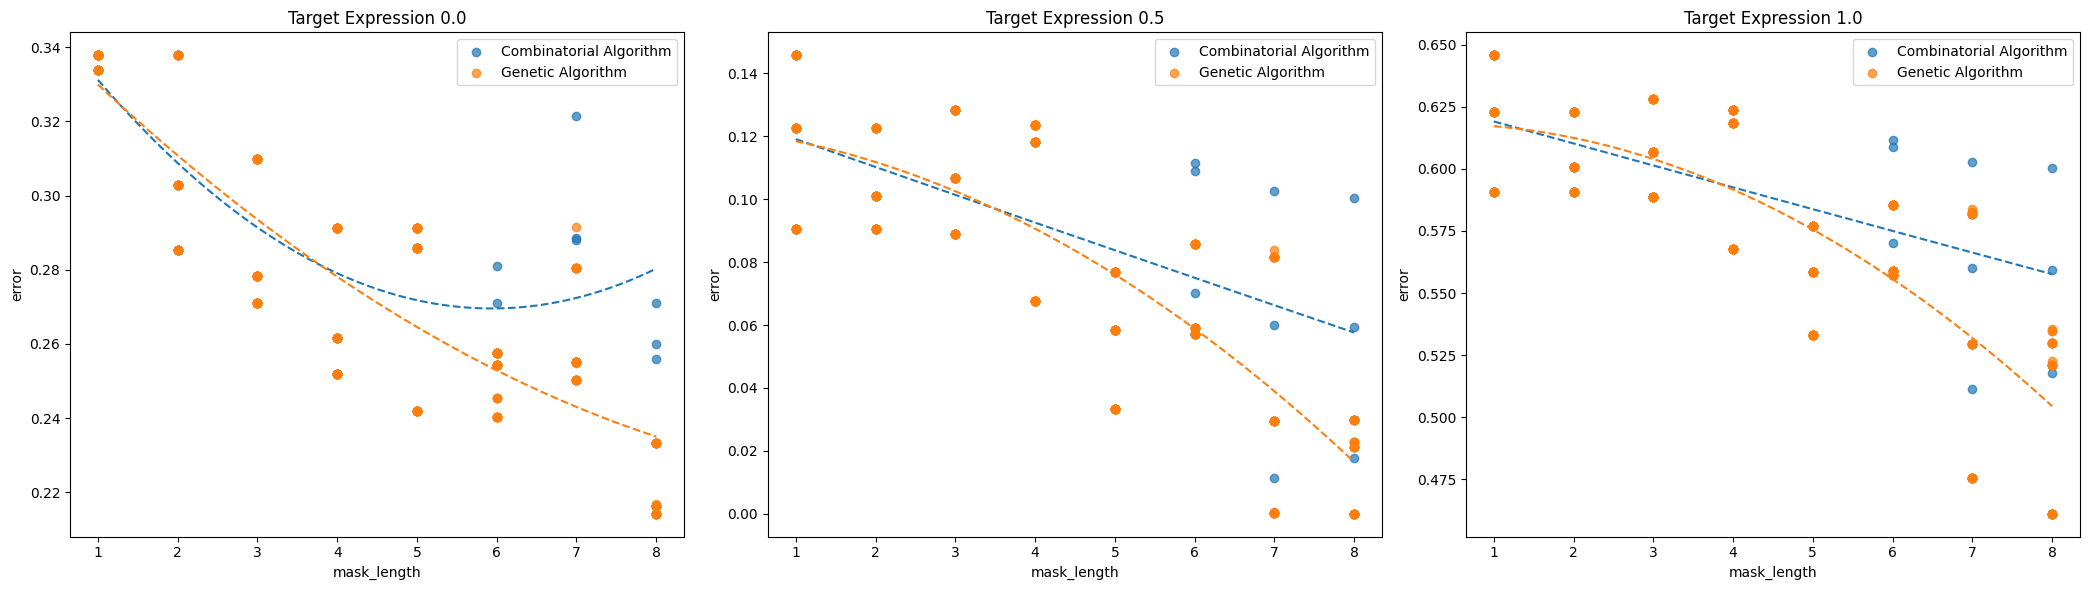

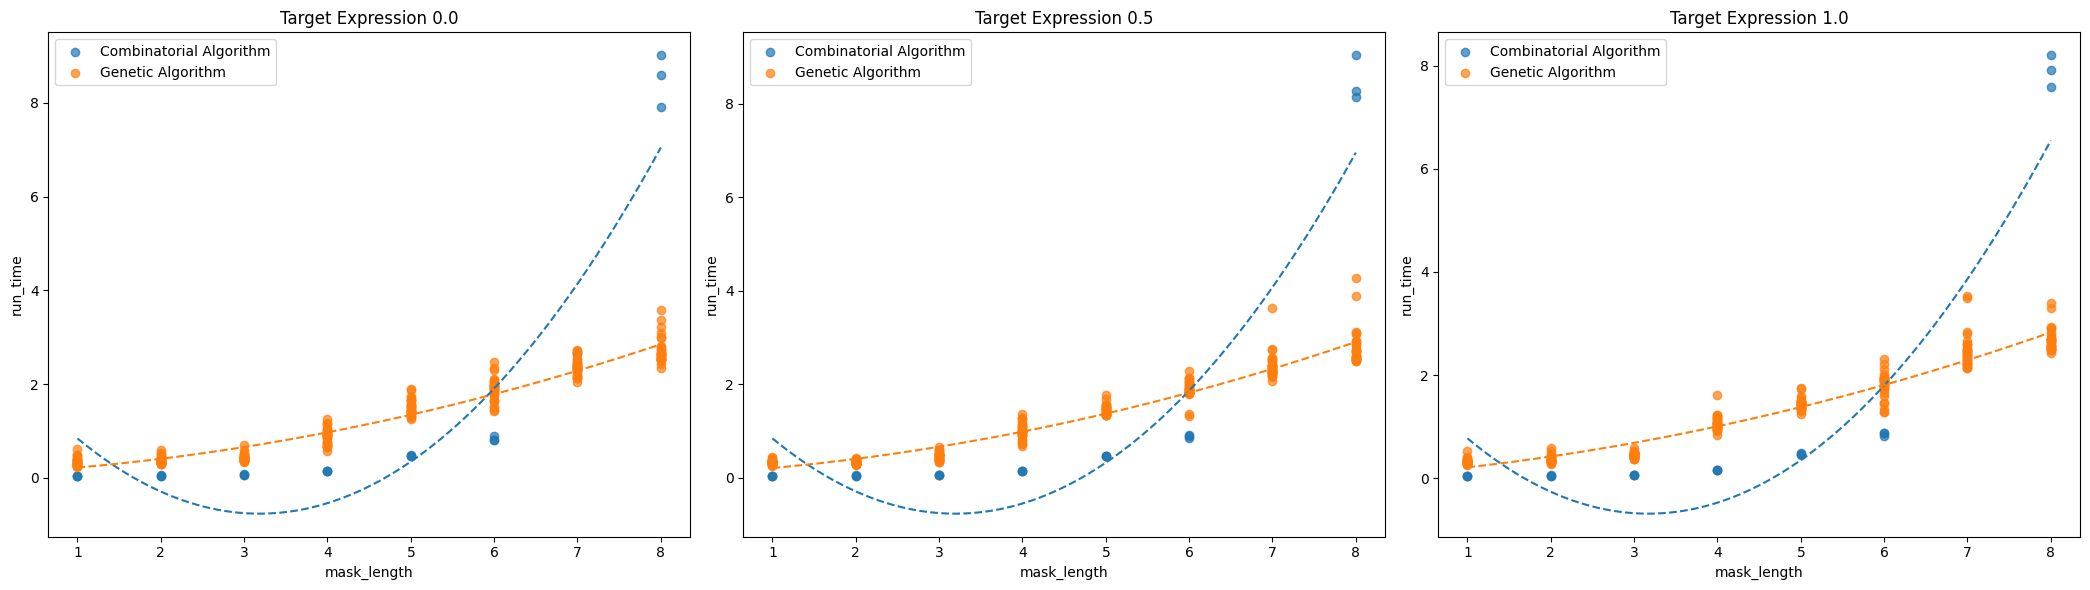

In [10]:
for metric in ['error', 'run_time']:
    combinatorial_scatter_plot_by_metric(results_df, metric, 'mask_length', 'algorithm', polynomial_degree=2)

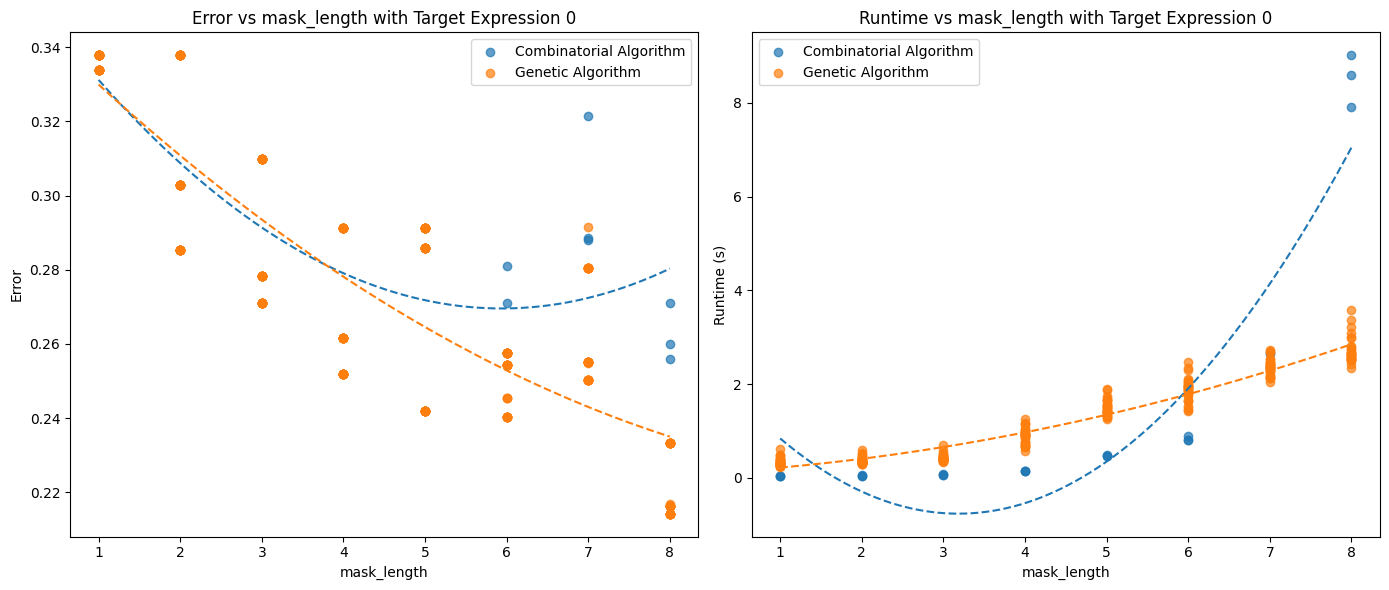

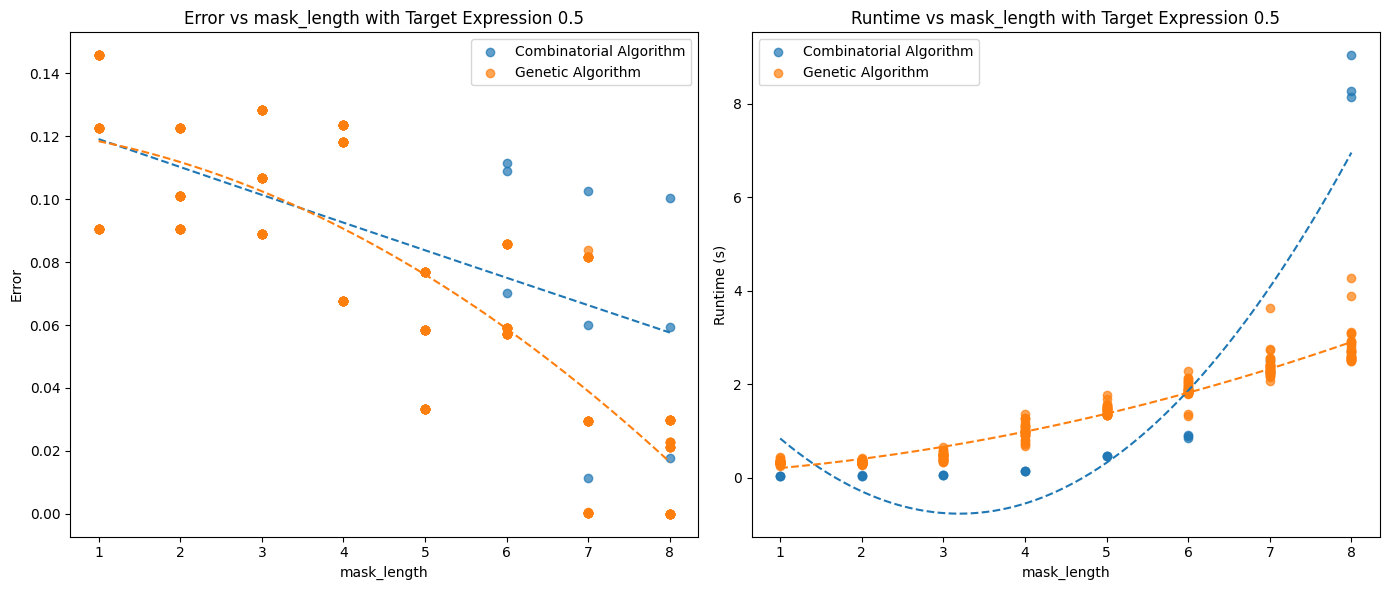

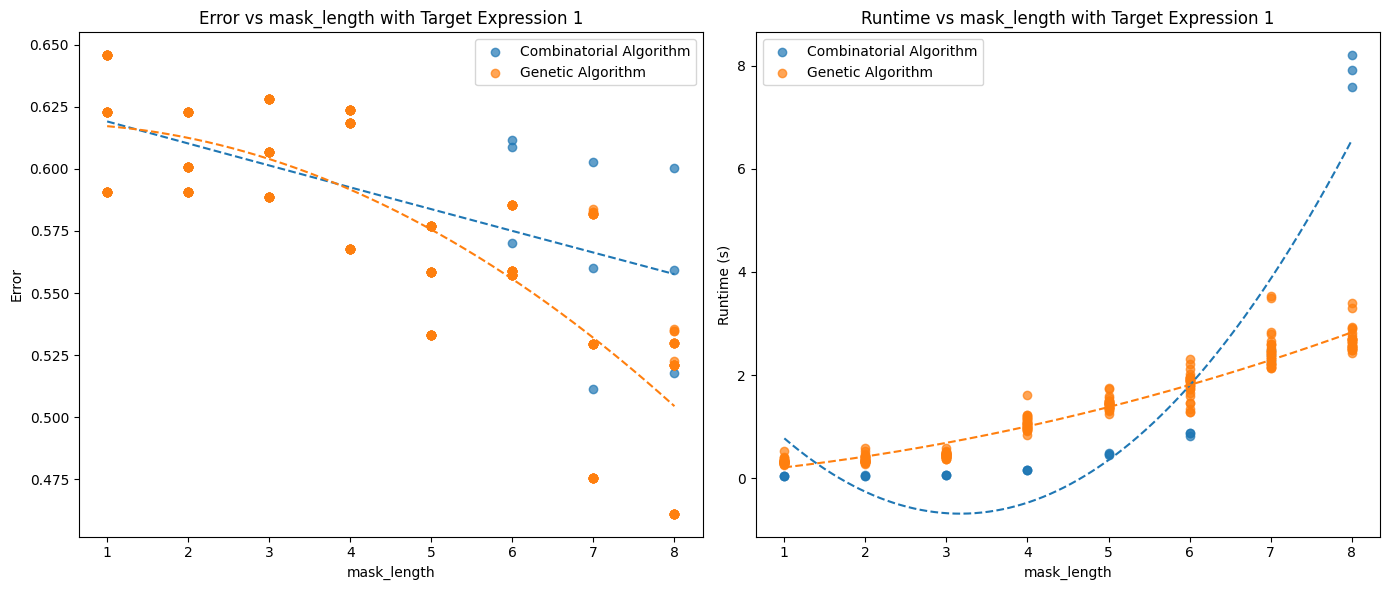

In [11]:
for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression].copy()
    combinatorial_scatter_plot(filtered_df, target_expression, 'mask_length', 'algorithm', polynomial_degree=2)